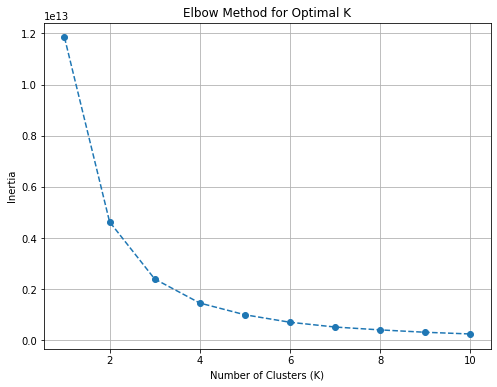

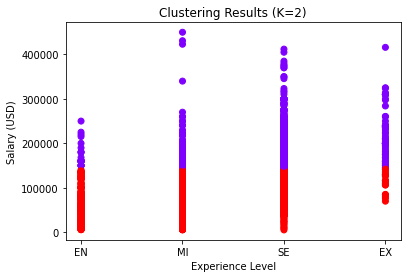

silhouette score of features: 
0.5387
rand index score of experience level: 
0.5071
adjusted rand index score of experience level: 
0.0145
normalized mutual infomaltion score of experience level: 
0.0747


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 1: Read the data from a CSV file named "salaries.csv"
data = pd.read_csv("'Country-data.csv'")

# Step 2: Use the specified features for clustering
features = [""]
X = data[features]

# Preprocess categorical columns (experience_level and job_title) using one-hot encoding
categorical_cols = ["experience_level", "job_title"]
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(data[categorical_cols])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_cols)

# Create a DataFrame with the encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Combine numerical and encoded categorical columns
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded_df], axis=1)

# Step 3: Cluster using K-Means with K = 1 to 10
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Step 4: Find the best K using the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Step 5: Visualize the clustering results with the best K
curvature = np.diff(inertia_values, 2)
best_k = curvature.argmax() + 2

best_kmeans = KMeans(n_clusters=best_k, random_state=42)
data['cluster'] = best_kmeans.fit_predict(X)

plt.scatter(data['experience_level'], data['salary_in_usd'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title(f'Clustering Results (K={best_k})')
plt.show()

# evaluation
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score,normalized_mutual_info_score

sil_scores = round(silhouette_score(X,data['cluster']),4) # use features check
ri_scores = round(rand_score(data['experience_level'],data['cluster']),4) # use experience level check
adr_scores = round(adjusted_rand_score(data['experience_level'],data['cluster']),4) # use experience level check
nmi_scores = round(normalized_mutual_info_score(data['experience_level'],data['cluster']),4) # use experience level check
    
print(f"silhouette score of features: \n{sil_scores}")
print(f"rand index score of experience level: \n{ri_scores}")
print(f"adjusted rand index score of experience level: \n{adr_scores}")
print(f"normalized mutual infomaltion score of experience level: \n{nmi_scores}")